## Introduccion

Este cuaderno se enfoca en la retención de empleados, un tema crucial para cualquier empresa, ya que la salida de personal (desgaste) puede generar altos costos y dificultades para reemplazar talento y experiencia. Utilizando datos de IBM, se realizará un análisis exploratorio de datos (EDA) y preprocesamiento para preparar el conjunto de datos

Fuente de datos : https://www.kaggle.com/code/mrshih/attention-to-retention-ibm-data

## Importacíon de librerias

In [12]:
#import re
#import sketch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.tools as tls # Import the plotly.tools module and alias it as tls
import plotly.graph_objs as go # Import plotly.graph_objs for using graph objects like Histogram and Scatter


#import geopandas as gpd
#from shapely.geometry import Point, Polygon
#import geojson
#import folium
#from folium.plugins import HeatMap
#from summarytools import dfSummary

##  Carga de Datos

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

In [14]:
datos = pd.read_csv('C:\Clases _ Phyton\IBM_DATOS_LIMPIOS')

##  Visualizando Relaciones entre Variables : Análisis de Correlaciones
Matriz de Correlación
Calcular la matriz de correlación para variables numéricas.Sirve para entender las relaciones entre variables numéricas es crucial, especialmente cuando se está preparando para un modelo predictivo.

In [15]:
# Seleccionar solo columnas numéricas
columnas_numericas = datos.select_dtypes(include=['int64', 'float64']).columns

In [16]:
numeric_cols = datos.select_dtypes(include=['int64', 'float64'])


Matriz de Correlacion:

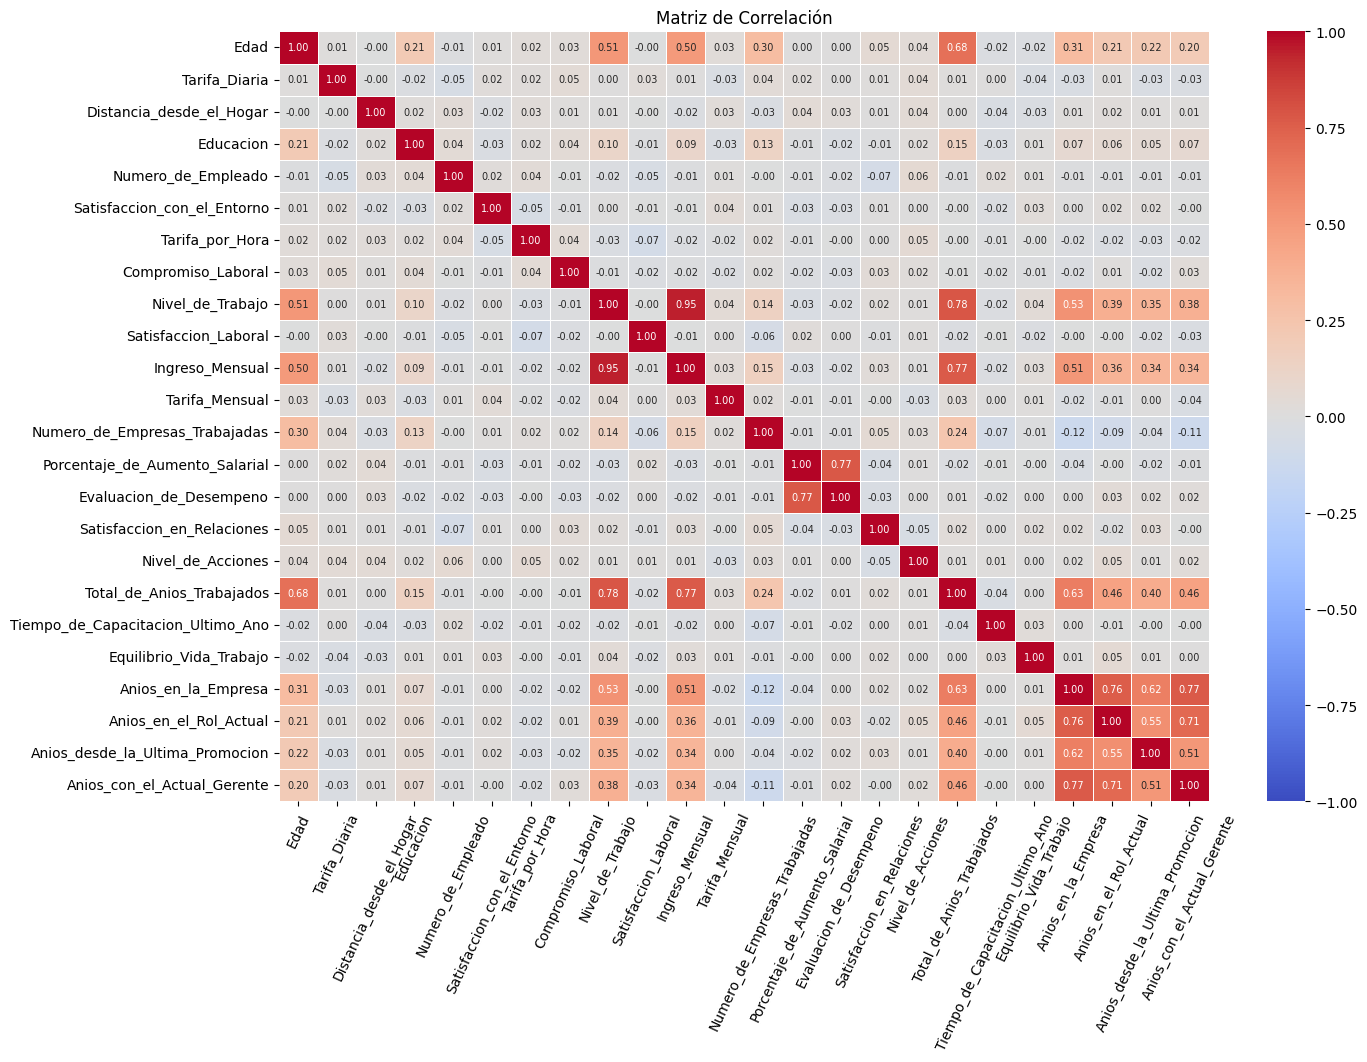

In [17]:
# Calcular la matriz de correlación
correlacion = datos[columnas_numericas].corr()

# Graficar un heatmap de la matriz de correlación

"""
1_ sns.heatmap(): Esta función de Seaborn se utiliza para crear mapas de calor.
2_ correlacion: Se asume que correlacion es una matriz de correlación, es decir,
una matriz cuadrada que muestra la relación entre pares de variables.
3_ annot=True: Este argumento indica que se deben mostrar los valores de
 correlación en cada celda del mapa de calor.
4_ cmap='coolwarm': Este argumento especifica el esquema de colores que se
utilizará para representar los valores de correlación. En este caso, se
utiliza el esquema "coolwarm", que va desde el azul (correlación negativa)
hasta el rojo (correlación positiva).
5_ fmt=".2f": Este argumento controla el formato de los valores de correlación
que se muestran en las celdas. En este caso, se formatea para mostrar dos decimales.
6_ vmin=-1: Este argumento establece el valor mínimo del rango de colores que se
utilizará en el mapa de calor. En este caso, se establece en -1,
lo que significa que los valores de correlación más negativos se
representarán con el color más azul.
7_ vmax=1: Este argumento establece el valor máximo del rango de colores que se -
utilizará en el mapa de calor. En este caso, se establece en 1, lo que
significa que los valores de correlación más positivos se representarán
con el color más rojo.
"""
plt.figure(figsize=(15, 10))  # Aumentar el tamaño de la figura
sns.heatmap(correlacion,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            xticklabels=correlacion.columns,
            yticklabels=correlacion.index,
            annot_kws={"size": 7},  # Reducir el tamaño de la fuente de los anotaciones
            linewidths=0.7)  # Aumentar el espacio entre las celdas
plt.title('Matriz de Correlación')
plt.xticks(rotation=65)  # Rotar las etiquetas del eje x
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y horizontales
plt.show()


Mapa de calor de la correlacion

In [18]:
numeric_cols = datos.select_dtypes(include=['int64', 'float64'])

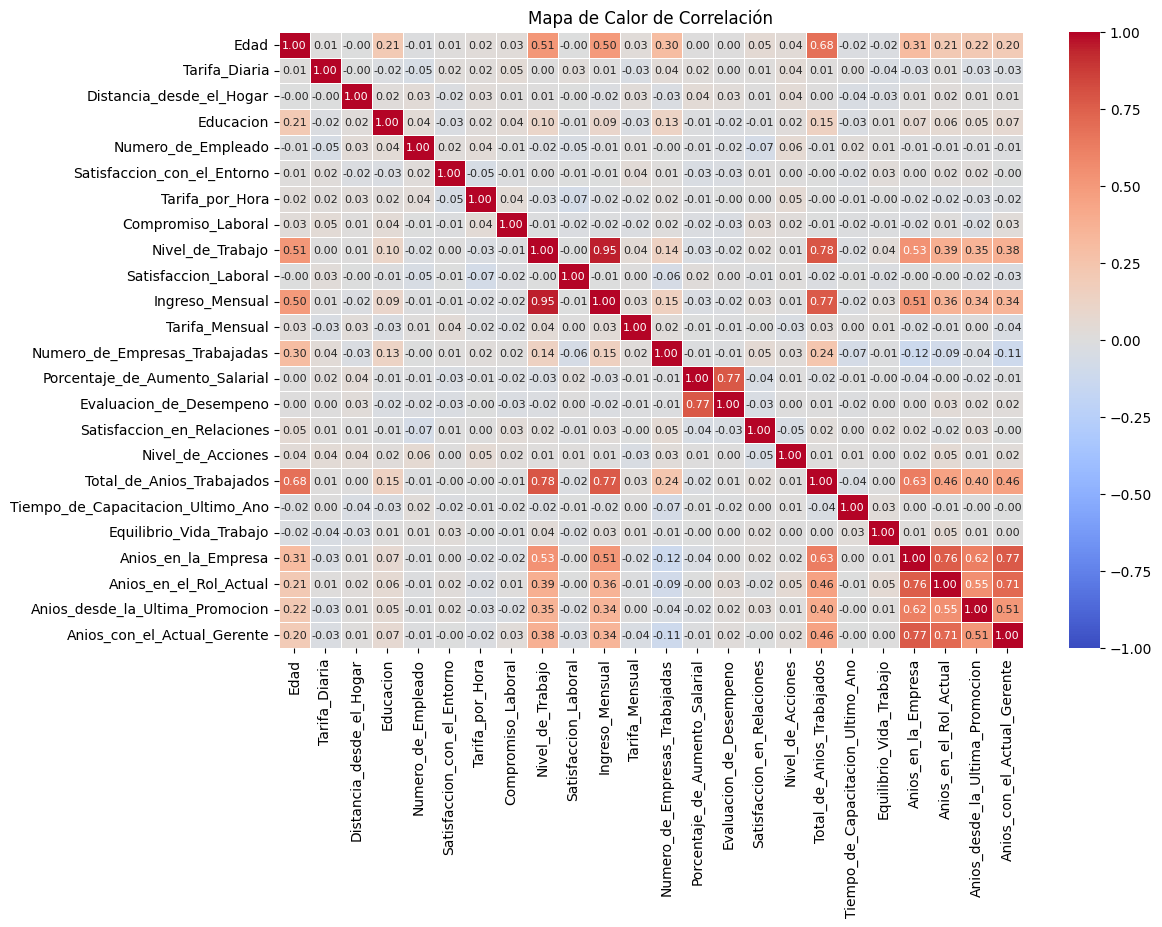

In [19]:
if numeric_cols.empty:
    print("No hay columnas numéricas para generar el mapa de calor.")
else:
    # Genera el mapa de calor
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_cols.corr(),
                annot=True,
                fmt=".2f",
                cmap='coolwarm',
                vmin=-1,
                vmax=1,
                xticklabels=correlacion.columns,
                yticklabels=correlacion.index,
                annot_kws={"size": 8},  # Reducir el tamaño de la fuente de los anotaciones
                linewidths=0.5)  # Aumentar el espacio entre las celdas
    plt.title('Mapa de Calor de Correlación')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x
    plt.yticks(rotation=0)  # Mantener las etiquetas del eje y horizontales
    plt.show()




## Análisis de Interacciones

Diagramas de dispersión entre dos variables: Sirve para identificar patrones complejos entre múltiples variables, puedes analizar cómo interactúan entre ellas.

Un diagrama de dispersión es como una nube de puntos que muestra la relación entre dos cosas. Cada punto representa un par de datos (por ejemplo, altura y peso de una persona). Si los puntos forman una línea, hay una relación entre las variables. Si están dispersos, no hay una relación clara.

Es útil para:

Visualizar relaciones: Ver de un vistazo si dos cosas están conectadas.
Hacer predicciones: Estimar un valor si conoces el otro.
Tomar decisiones: Basar decisiones en los patrones encontrados.

In [20]:
# se observan los distintos tipos de datos en la columna Desercion
datos['Desercion'].unique()

array(['Si', 'No'], dtype=object)

In [21]:
# Re reemplazan los valores 1 y 0 por "Sí" y "No" en la columna "Columna1"
datos['Desercion'] = datos['Desercion'].replace({1: 'Sí', 0: 'No'})

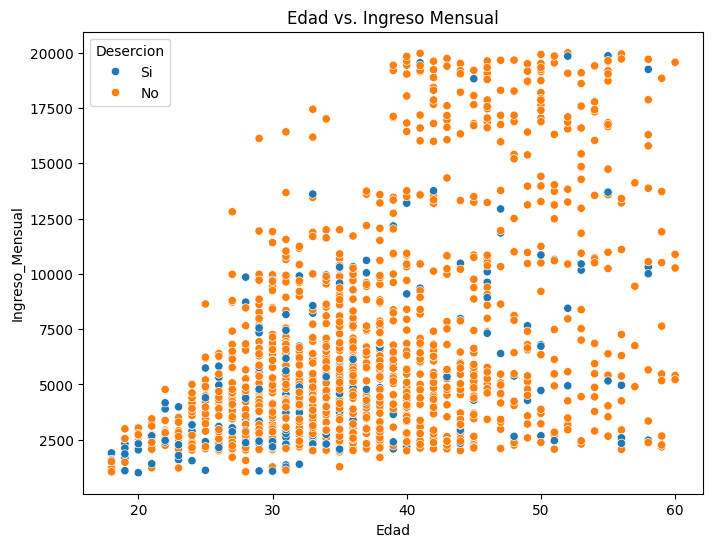

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datos, x='Edad', y='Ingreso_Mensual', hue='Desercion')
plt.title('Edad vs. Ingreso Mensual')
plt.show()

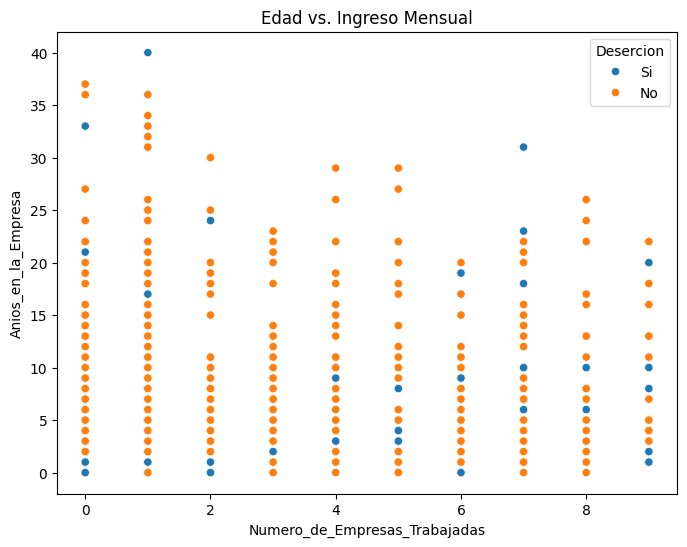

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datos,  x='Numero_de_Empresas_Trabajadas',y='Anios_en_la_Empresa', hue='Desercion')
plt.title('Edad vs. Ingreso Mensual')
plt.show()

### Diagramas de Caja para Variables Categóricas
Para las variables categóricas, es importante analizar cuántas categorías hay y cuál es la distribución de los datos en cada categoría.

Visualizar la distribución de variables numéricas a través de categorías, donde se observa que la caja azul concentra la mayor parte de los valores y los puntos son vaolres aislados.

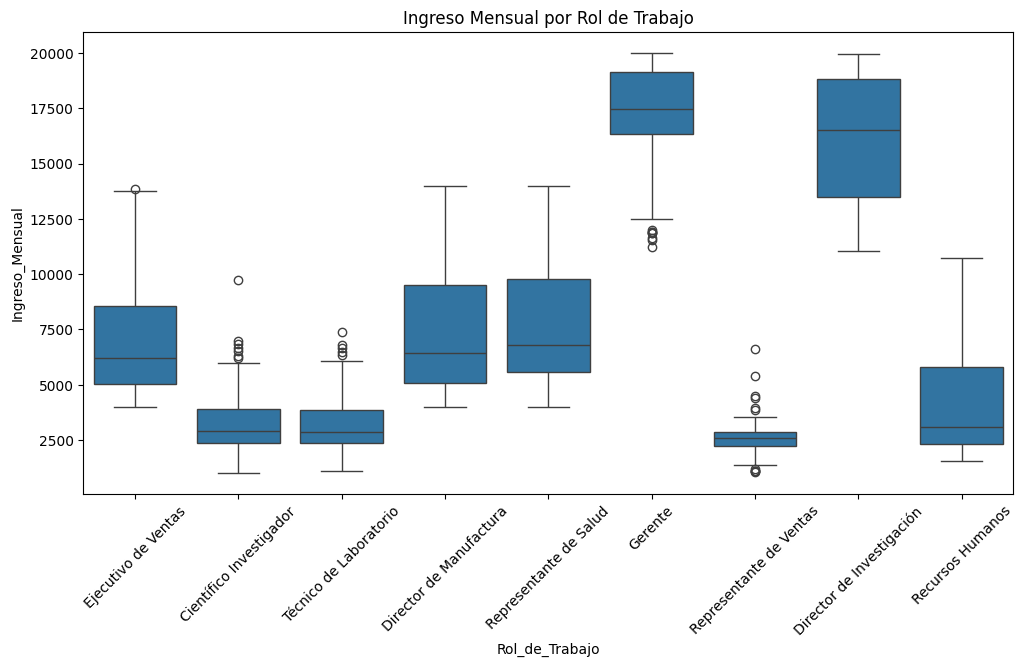

In [24]:
# Diagrama de caja de 'Ingreso Mensual' por 'Rol de trabajo'
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos, x='Rol_de_Trabajo', y='Ingreso_Mensual')
plt.title('Ingreso Mensual por Rol de Trabajo')
plt.xticks(rotation=45)
plt.show()

### Comprobando el Equilibrio de los Datos
Para tareas de clasificación, es importante verificar si la variable objetivo está equilibrada.nos referimos a que las diferentes categorías o clases de esa variable están representadas de manera más o menos equitativa en el conjunto de datos.

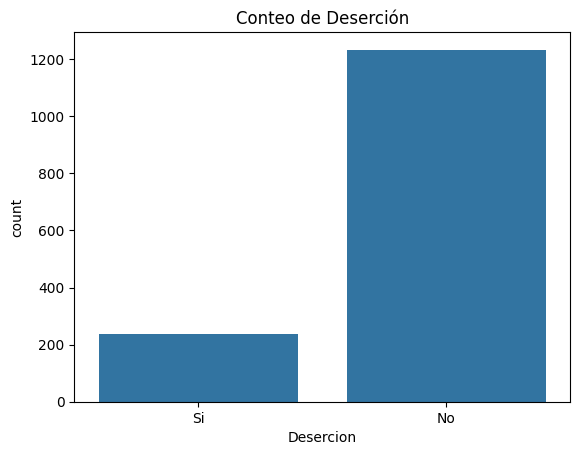

In [25]:
# Gráfico de conteo para la variable objetivo 'Desercion'
sns.countplot(data=datos, x='Desercion')
plt.title('Conteo de Deserción')
plt.show()

In [26]:
# Se observa por cantidad la  distribución de la columna Desercion
attrition_counts = datos['Desercion'].value_counts()
print(attrition_counts)

Desercion
No    1233
Si     237
Name: count, dtype: int64


## Resumiendo Hallazgos
Basado en el análisis exploratorio inicial, resume cualquier hallazgo notable, como:

- Distribución de variables clave.
- Presencia de valores atípicos.
- Relaciones potenciales entre variables.
- Problemas de calidad de datos que necesitan ser abordados.

In [27]:
# Muestra a azar 5 elementos
datos.sample(5, random_state=8)

Edad Desercion Viaje_de_Negocios  Tarifa_Diaria  \
1441    56        No        Sin Viajes            667   
81      35        No      Viajes Raros           1214   
243     40        No      Viajes Raros           1300   
1142    45        No      Viajes Raros           1015   
51      28        Si      Viajes Raros           1434   

                    Departamento  Distancia_desde_el_Hogar  Educacion  \
1441  Investigación y Desarrollo                         1          4   
81    Investigación y Desarrollo                         1          3   
243   Investigación y Desarrollo                        24          2   
1142  Investigación y Desarrollo                         5          5   
51    Investigación y Desarrollo                         5          4   

       Campo_de_Educacion  Numero_de_Empleado  Satisfaccion_con_el_Entorno  \
1441  Ciencias de la Vida                2026                            3   
81                 Médica                 105                            2   
243         Grado Técnico                 335                            1   
1142               Médica                1611                            3   
51          Grado Técnico                  65                            3   

      ... Evaluacion_de_Desempeno  Satisfaccion_en_Relaciones  \
1441  ...                       4                           1   
81    ...                       3                           1   
243   ...                       3                           1   
1142  ...                       3                           1   
51    ...                       3                           3   

      Nivel_de_Acciones  Total_de_Anios_Trabajados  \
1441                  1                         13   
81                    0                          6   
243                   2                          9   
1142                  0                         10   
51                    0                          2   

     Tiempo_de_Capacitacion_Ultimo_Ano  Equilibrio_Vida_Trabajo  \
1441                                 2                        2   
81                                   3                        3   
243                                  3                        3   
1142                                 3                        3   
51                                   3                        2   

     Anios_en_la_Empresa  Anios_en_el_Rol_Actual  \
1441                  13                      12   
81                     6                       4   
243                    9                       8   
1142                  10                       7   
51                     2                       2   

      Anios_desde_la_Ultima_Promocion  Anios_con_el_Actual_Gerente  
1441                                1                            9  
81                                  0                            4  
243                                 4                            7  
1142                                1                            4  
51                                  2                            2  

[5 rows x 32 columns]

### Conteos de Variables Categóricas
Ahora analizaremos las variables categóricas y veremos sus conteos y cómo se distribuyen los conteos de empleados.


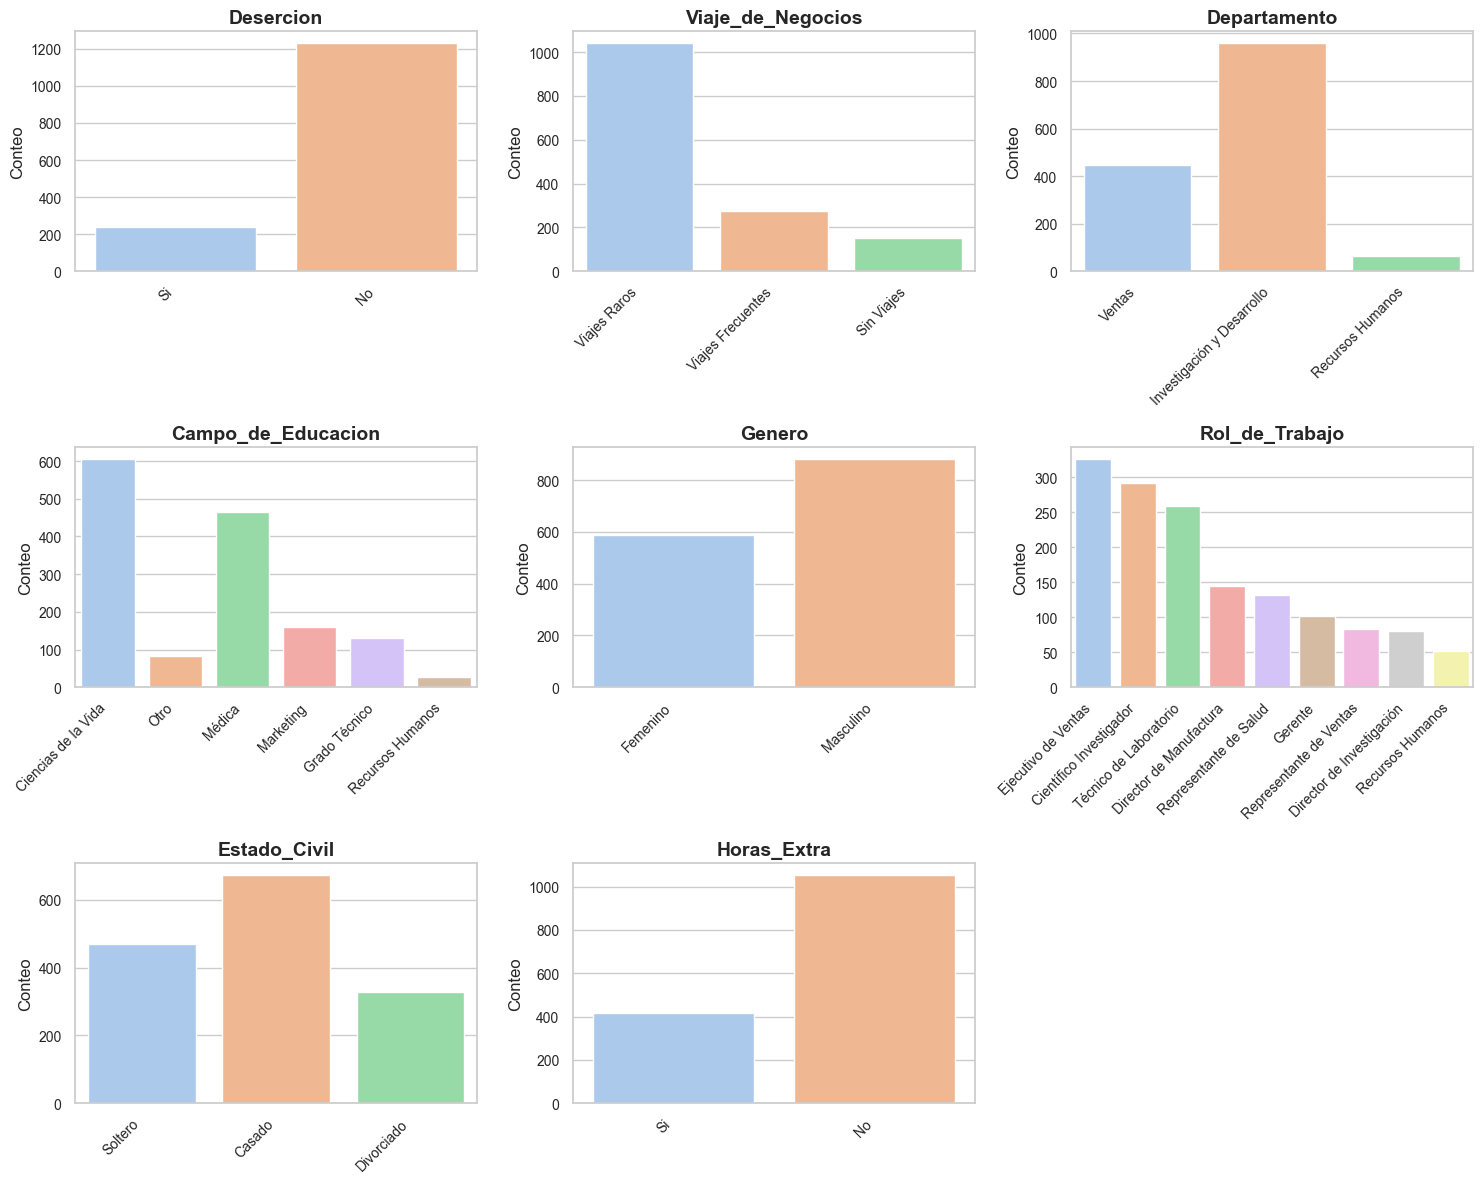

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el estilo de Seaborn
sns.set(style="whitegrid")

# Listar las columnas categóricas
categorical_columns = datos.select_dtypes(include=['object', 'category']).columns

# Crear gráficos para cada columna categórica
plt.figure(figsize=(15, 12))  # Tamaño de figura más grande para mayor claridad
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Ajusta el número de filas y columnas según sea necesario

    # Crear el gráfico pasando el hue como la misma columna y aplicando la paleta
    sns.countplot(data=datos, x=column, hue=column, palette="pastel", dodge=False)
    plt.title(column, fontsize=14, weight='bold')  # Títulos en negrita
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Mejor legibilidad
    plt.yticks(fontsize=10)
    plt.xlabel('')  # Eliminar etiqueta del eje x para un aspecto más limpio
    plt.ylabel('Conteo', fontsize=12)

# Ajustar el diseño para un ajuste adecuado
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [29]:
import plotly.graph_objs as go
import plotly.offline as py
import plotly.subplots as sp  # Se importa la función de subplots desde plotly.subplots
import numpy as np
import pandas as pd

# Para Jupyter Notebook, si estás trabajando allí
py.init_notebook_mode(connected=True)




# Selección de columnas categóricas
cat_cols = list(datos.select_dtypes(exclude=np.number).columns)
# cat_cols.remove('Attrition')  # Descomenta si necesitas remover 'Attrition'

# Configuración del grid de subplots
fig_rows = 3  # Ajusta según la cantidad de gráficos que quieras, esto es solo un ejemplo
fig_cols = 3  # Ajusta según tus datos
fig = sp.make_subplots(rows=fig_rows, cols=fig_cols, subplot_titles=tuple(cat_cols))

# Variables para rastrear la posición actual en la grid
curr_row = 1
curr_col = 1

# Crear los gráficos de barras para cada variable categórica
for i, col in enumerate(cat_cols):
    trace = go.Bar(
        name=col,
        x=datos[col].value_counts().index.values,
        y=datos[col].value_counts().values,
        marker=dict(line=dict(color='black', width=1))
    )
    fig.add_trace(trace, row=curr_row, col=curr_col)  # Se utiliza add_trace en versiones recientes
    curr_col += 1
    if curr_col > fig_cols:  # Avanzar a la siguiente fila si se completa la columna
        curr_row += 1
        curr_col = 1

# Actualizar el layout del gráfico
fig.update_layout(title='Conteo de Variables Categóricas', width=900, height=600, showlegend=False)

# Mostrar el gráfico
py.iplot(fig)
plt.show()

Aquí, vemos que ninguna de las otras variables categóricas mostradas está tan desequilibrada como Attrition (Deserción), aunque BusinessTravel (Viajes de Negocios) se acerca.


Además, al observar Department (Departamento), EducationField (Campo de Educación) y JobRole (Rol de Trabajo), también podemos ver que estos empleados parecen representar algún tipo de negocio en la industria de investigación médica.


Por supuesto, una de las variables más importantes para este cuaderno es Attrition (Deserción), así que echemos un vistazo a esa con un gráfico más grande para facilitar su interpretación.


C:\Users\luisf\AppData\Local\Temp\ipykernel_30316\3361880233.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




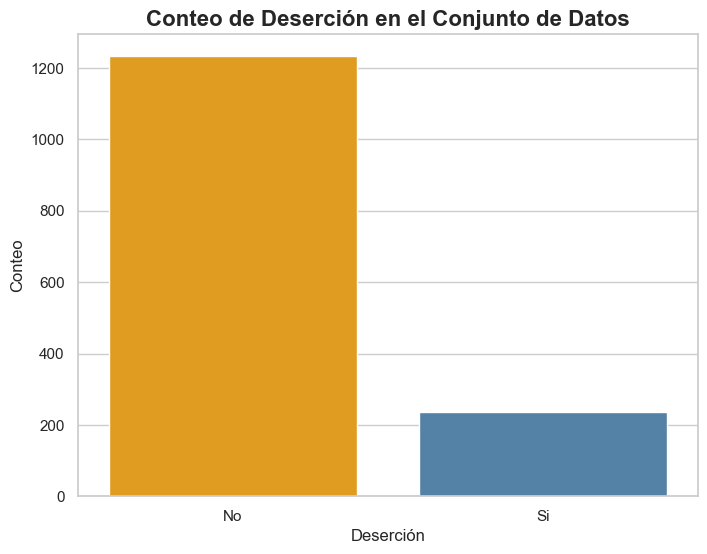

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de Seaborn
sns.set(style="whitegrid")

# Contar los valores de la columna "Attrition"
attrition_counts = datos["Desercion"].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette=['Orange', 'steelblue'])

# Título y etiquetas
plt.title('Conteo de Deserción en el Conjunto de Datos', fontsize=16, weight='bold')
plt.xlabel('Deserción', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Mostrar el gráfico
plt.show()


"Vemos que hay un desequilibrio significativo entre las dos clases de nuestra variable objetivo. Aproximadamente el 83% no tiene deserción, mientras que el restante sí. Existen muchas técnicas para abordar un conjunto de datos con una variable objetivo desequilibrada. Estas técnicas se clasifican principalmente en técnicas de sobremuestreo (de la clase minoritaria) o submuestreo (de la clase mayoritaria)

## Distribuciones de Variables Numéricas

Con los datos ahora un poco más limpios, vamos a observar la **distribución de las características numéricas** en el conjunto de datos. Es importante señalar que algunas de las variables se leen como enteros (numéricas), pero representan una cantidad discreta de valores. Estas variables (y los significados de los enteros si se conocen) se presentan a continuación:

- **Education**
  - 1: 'Por debajo de la universidad'
  - 2: 'Universidad'
  - 3: 'Licenciatura'
  - 4: 'Maestría'
  - 5: 'Doctorado'
- **EnvironmentSatisfaction**
  - 1: 'Bajo'
  - 2: 'Medio'
  - 3: 'Alto'
  - 4: 'Muy Alto'
- **JobInvolvement**
  - 1: 'Bajo'
  - 2: 'Medio'
  - 3: 'Alto'
  - 4: 'Muy Alto'
- **JobSatisfaction**
  - 1: 'Bajo'
  - 2: 'Medio'
  - 3: 'Alto'
  - 4: 'Muy Alto'
- **PerformanceRating**
  - 1: 'Bajo'
  - 2: 'Bueno'
  - 3: 'Excelente'
  - 4: 'Sobresaliente'
- **RelationshipSatisfaction**
  - 1: 'Bajo'
  - 2: 'Medio'
  - 3: 'Alto'
  - 4: 'Muy Alto'
- **WorkLifeBalance**
  - 1: 'Malo'
  - 2: 'Bueno'
  - 3: 'Mejor'
  - 4: 'El Mejor'
- **JobLevel**
- **StockOptionLevel**

Por ahora, trataremos estas como variables numéricas. Aunque estas variables tienen un orden, sus significados como enteros pueden ser erróneos. Por ejemplo, tener una 'Licenciatura' (3) no significa necesariamente que sea 3 veces 'mejor' que tener educación 'Por debajo de la universidad' (1); sin embargo, estas características son **ordinales** (es decir, las categorías tienen un orden donde una es mayor que otra).

---

**Distribuciones de Características Numéricas**

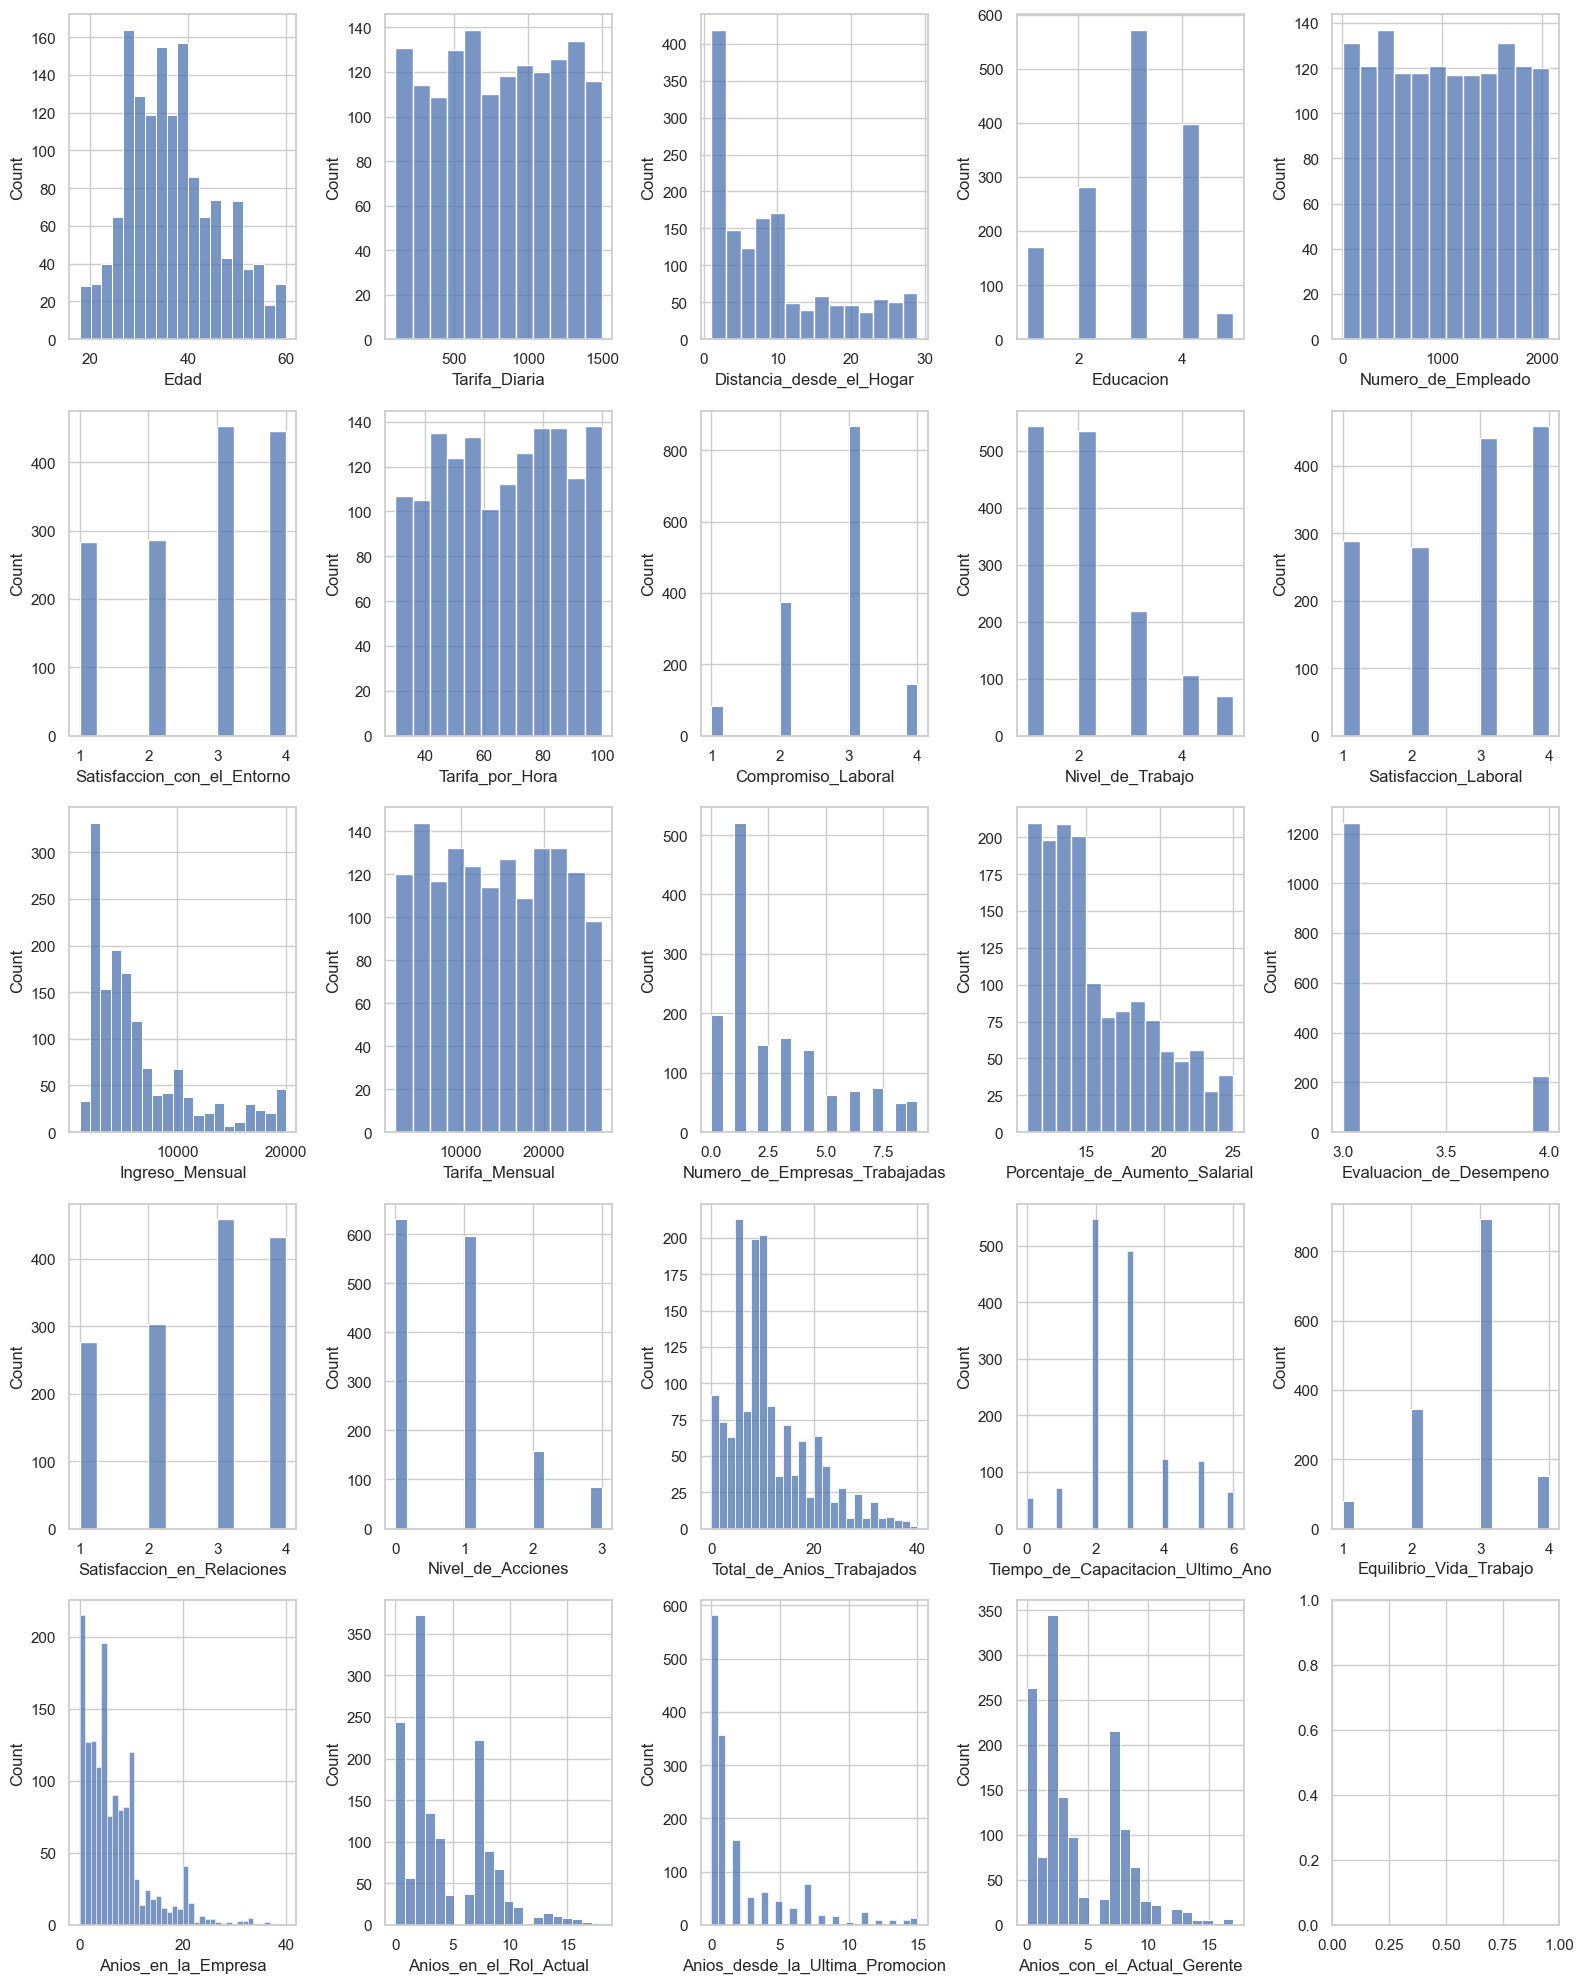

In [31]:
import warnings  # Queremos suprimir advertencias
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")  # Ignorar advertencias

fig_rows = 5
fig_cols = 5
fig, ax = plt.subplots(fig_rows, fig_cols, figsize=(16, 20))

fake_numeric_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                     'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                     'WorkLifeBalance', 'JobLevel', 'StockOptionLevel']

# Seleccionar las columnas numéricas
numericCols = list(datos.select_dtypes(include=np.number).columns)

# Ajustar el número de gráficos para evitar el error de índice
num_plots = min(len(numericCols), fig_rows * fig_cols)

curr_row = 0
curr_col = 0

for i in range(num_plots):
    col = numericCols[i]
    sns.histplot(datos[col], ax=ax[curr_row, curr_col], kde=False)  # Usar histplot en lugar de distplot
    curr_col += 1
    if curr_col >= fig_cols:  # Reiniciar la columna y avanzar a la siguiente fila
        curr_row += 1
        curr_col = 0

plt.tight_layout()  # Ajustar el diseño
plt.show()


___
Aquí vemos histogramas de cada variable numérica en el conjunto de datos junto con marcas azules en la parte superior del eje x que representan dónde se encuentra una sola observación (empleado). Esto ayuda a visualizar las distribuciones de las variables numéricas. Por ejemplo, vemos que la **Edad** está distribuida casi normalmente con una ligera cola a la derecha; mientras que las características de tasa (**Diaria**, **Mensual**, **Por Hora**) parecen estar cercanas a una distribución uniforme.

Es interesante notar que las distribuciones (y valores) de la **Tasa Mensual** y el **Ingreso Mensual** son muy diferentes. Asumiría que serían similares. Intenté buscar el significado de estas características en otros notebooks junto con algunos artículos de IBM sobre el conjunto de datos, pero no pude obtener sus definiciones.

Similar a parte de la información proporcionada en los gráficos anteriores, también podemos tomar nota de algunas estadísticas comunes de las características numéricas que se dan a continuación:

In [32]:
datos[numericCols].describe().T

count          mean          std     min  \
Edad                               1470.0     36.923810     9.135373    18.0   
Tarifa_Diaria                      1470.0    802.485714   403.509100   102.0   
Distancia_desde_el_Hogar           1470.0      9.192517     8.106864     1.0   
Educacion                          1470.0      2.912925     1.024165     1.0   
Numero_de_Empleado                 1470.0   1024.865306   602.024335     1.0   
Satisfaccion_con_el_Entorno        1470.0      2.721769     1.093082     1.0   
Tarifa_por_Hora                    1470.0     65.891156    20.329428    30.0   
Compromiso_Laboral                 1470.0      2.729932     0.711561     1.0   
Nivel_de_Trabajo                   1470.0      2.063946     1.106940     1.0   
Satisfaccion_Laboral               1470.0      2.728571     1.102846     1.0   
Ingreso_Mensual                    1470.0   6502.931293  4707.956783  1009.0   
Tarifa_Mensual                     1470.0  14313.103401  7117.786044  2094.0   
Numero_de_Empresas_Trabajadas      1470.0      2.693197     2.498009     0.0   
Porcentaje_de_Aumento_Salarial     1470.0     15.209524     3.659938    11.0   
Evaluacion_de_Desempeno            1470.0      3.153741     0.360824     3.0   
Satisfaccion_en_Relaciones         1470.0      2.712245     1.081209     1.0   
Nivel_de_Acciones                  1470.0      0.793878     0.852077     0.0   
Total_de_Anios_Trabajados          1470.0     11.279592     7.780782     0.0   
Tiempo_de_Capacitacion_Ultimo_Ano  1470.0      2.799320     1.289271     0.0   
Equilibrio_Vida_Trabajo            1470.0      2.761224     0.706476     1.0   
Anios_en_la_Empresa                1470.0      7.008163     6.126525     0.0   
Anios_en_el_Rol_Actual             1470.0      4.229252     3.623137     0.0   
Anios_desde_la_Ultima_Promocion    1470.0      2.187755     3.222430     0.0   
Anios_con_el_Actual_Gerente        1470.0      4.123129     3.568136     0.0   

                                       25%      50%       75%      max  
Edad                                 30.00     36.0     43.00     60.0  
Tarifa_Diaria                       465.00    802.0   1157.00   1499.0  
Distancia_desde_el_Hogar              2.00      7.0     14.00     29.0  
Educacion                             2.00      3.0      4.00      5.0  
Numero_de_Empleado                  491.25   1020.5   1555.75   2068.0  
Satisfaccion_con_el_Entorno           2.00      3.0      4.00      4.0  
Tarifa_por_Hora                      48.00     66.0     83.75    100.0  
Compromiso_Laboral                    2.00      3.0      3.00      4.0  
Nivel_de_Trabajo                      1.00      2.0      3.00      5.0  
Satisfaccion_Laboral                  2.00      3.0      4.00      4.0  
Ingreso_Mensual                    2911.00   4919.0   8379.00  19999.0  
Tarifa_Mensual                     8047.00  14235.5  20461.50  26999.0  
Numero_de_Empresas_Trabajadas         1.00      2.0      4.00      9.0  
Porcentaje_de_Aumento_Salarial       12.00     14.0     18.00     25.0  
Evaluacion_de_Desempeno               3.00      3.0      3.00      4.0  
Satisfaccion_en_Relaciones            2.00      3.0      4.00      4.0  
Nivel_de_Acciones                     0.00      1.0      1.00      3.0  
Total_de_Anios_Trabajados             6.00     10.0     15.00     40.0  
Tiempo_de_Capacitacion_Ultimo_Ano     2.00      3.0      3.00      6.0  
Equilibrio_Vida_Trabajo               2.00      3.0      3.00      4.0  
Anios_en_la_Empresa                   3.00      5.0      9.00     40.0  
Anios_en_el_Rol_Actual                2.00      3.0      7.00     18.0  
Anios_desde_la_Ultima_Promocion       0.00      1.0      3.00     15.0  
Anios_con_el_Actual_Gerente           2.00      3.0      7.00     17.0

Aquí, vemos el conteo, la media y la desviación estándar junto con el resumen de cinco números.

## Relaciones entre Variables/Características

Aquí examinaremos cómo las variables se relacionan entre sí. Hay varios métodos y visualizaciones para esto.

### Matriz de Correlación

Un método para ver cómo las características están relacionadas entre sí es una matriz de correlación que se muestra a continuación:

**Nota:** Convertimos **Attrition** a 1 para 'Sí' y 0 para 'No' para poder ver si alguna variable/característica está correlacionada con la variable objetivo.

In [33]:
# Import needed libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Import statements required for Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Import Models
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define constants/variables to use
seed_Num = 8 # aka Random State
num_folds = 5

In [34]:
pd.DataFrame(data = {'Data Type': datos.dtypes,
                     'Number of Unique Values': datos.nunique().sort_values(),
                     'Contains NAs': datos.isnull().any(),
                     'Number of NAs': datos.isnull().sum()}).sort_values('Number of Unique Values')

Data Type  Number of Unique Values  \
Desercion                            object                        2   
Evaluacion_de_Desempeno               int64                        2   
Horas_Extra                          object                        2   
Genero                               object                        2   
Estado_Civil                         object                        3   
Departamento                         object                        3   
Viaje_de_Negocios                    object                        3   
Compromiso_Laboral                    int64                        4   
Satisfaccion_Laboral                  int64                        4   
Satisfaccion_con_el_Entorno           int64                        4   
Nivel_de_Acciones                     int64                        4   
Satisfaccion_en_Relaciones            int64                        4   
Equilibrio_Vida_Trabajo               int64                        4   
Educacion                             int64                        5   
Nivel_de_Trabajo                      int64                        5   
Campo_de_Educacion                   object                        6   
Tiempo_de_Capacitacion_Ultimo_Ano     int64                        7   
Rol_de_Trabajo                       object                        9   
Numero_de_Empresas_Trabajadas         int64                       10   
Porcentaje_de_Aumento_Salarial        int64                       15   
Anios_desde_la_Ultima_Promocion       int64                       16   
Anios_con_el_Actual_Gerente           int64                       18   
Anios_en_el_Rol_Actual                int64                       19   
Distancia_desde_el_Hogar              int64                       29   
Anios_en_la_Empresa                   int64                       37   
Total_de_Anios_Trabajados             int64                       40   
Edad                                  int64                       43   
Tarifa_por_Hora                       int64                       71   
Tarifa_Diaria                         int64                      886   
Ingreso_Mensual                       int64                     1349   
Tarifa_Mensual                        int64                     1427   
Numero_de_Empleado                    int64                     1470   

                                   Contains NAs  Number of NAs  
Desercion                                 False              0  
Evaluacion_de_Desempeno                   False              0  
Horas_Extra                               False              0  
Genero                                    False              0  
Estado_Civil                              False              0  
Departamento                              False              0  
Viaje_de_Negocios                         False              0  
Compromiso_Laboral                        False              0  
Satisfaccion_Laboral                      False              0  
Satisfaccion_con_el_Entorno               False              0  
Nivel_de_Acciones                         False              0  
Satisfaccion_en_Relaciones                False              0  
Equilibrio_Vida_Trabajo                   False              0  
Educacion                                 False              0  
Nivel_de_Trabajo                          False              0  
Campo_de_Educacion                        False              0  
Tiempo_de_Capacitacion_Ultimo_Ano         False              0  
Rol_de_Trabajo                            False              0  
Numero_de_Empresas_Trabajadas             False              0  
Porcentaje_de_Aumento_Salarial            False              0  
Anios_desde_la_Ultima_Promocion           False              0  
Anios_con_el_Actual_Gerente               False              0  
Anios_en_el_Rol_Actual                    False              0  
Distancia_desde_el_Hogar                  False              0  
Anios_en_la_Empresa             

In [35]:
heatmapCols = numericCols + ['Desercion']
temp = datos.copy()
temp['Desercion'] = datos['Desercion'].replace('Si',1).replace('No',0)

heatmapGo = [go.Heatmap(
        z= temp[heatmapCols].astype(float).corr().values, # Generating the Pearson correlation
        x= temp[heatmapCols].columns.values,
        y= temp[heatmapCols].columns.values,
        colorscale='Cividis',
        reversescale = False,
        opacity = 1.0)]

layout = go.Layout(
    title='Pearson Correlation Matrix Numerical Features',
    xaxis = dict(ticks='', tickfont = dict(size = 10)),
    yaxis = dict(ticks='', tickfont = dict(size = 7)),
    width = 900, height = 700)

fig = go.Figure(data=heatmapGo, layout=layout)
py.iplot(fig, filename='labelled-heatmap')




Aquí vemos que la mayoría de los atributos **no están bien correlacionados entre sí** (es decir, valores cercanos a cero); sin embargo, hay algunos puntos 'calientes' o 'oscuros' en el gráfico.


Por un lado, el área 'caliente' en la esquina superior derecha con los colores amarillo/marrón corresponde a las variables de **'años'**, que están algo correlacionadas entre sí. Esto tiene sentido. Por ejemplo, si uno tiene más años en la empresa, se puede esperar razonablemente más años en el rol actual.

El otro punto caliente interesante es entre **Job Level** (Nivel de Trabajo) y **Monthly Income** (Ingreso Mensual) con una correlación de ¡justo por encima de 0.95! Las dos filas y dos columnas correspondientes a estas características tienen colores similares. Esto muestra que estas dos características/variables proporcionan información similar.


Otra cosa interesante a notar es la falta de correlación entre **HourlyRate** (Tarifa Horaria), **DailyRate** (Tarifa Diaria) y **MonthlyRate** (Tarifa Mensual). Uno pensaría que estas variables deberían correlacionarse bien entre sí; sin embargo, los datos parecen indicar lo contrario.



## Gráfico de Pares (Pair Plot)

Otro método para visualizar la relación entre variables es un **pairplot**. Es una cuadrícula de gráficos con las mismas características en los ejes x e y de la cuadrícula. Puede mostrar distribuciones a lo largo de la diagonal (como los histogramas en la sección anterior). También puede mostrar gráficos de dispersión en las celdas fuera de la diagonal para mostrar cómo se relacionan dos variables. Aquí, también coloreamos según **Attrition** para ver si surgen relaciones fáciles o evidentes, y también mostramos solo los años totales de trabajo para las variables de 5 años para hacer el gráfico un poco más fácil de leer.

Comencemos primero con las variables verdaderamente numéricas:

'Age': 'Edad',
    'Attrition': 'Desercion',
    'BusinessTravel': 'Viaje_de_Negocios',
    'DailyRate': 'Tarifa_Diaria',
    'Department': 'Departamento',
    'DistanceFromHome': 'Distancia_desde_el_Hogar',
    'Education': 'Educacion',
    'EducationField': 'Campo_de_Educacion',
    'EmployeeCount': 'Conteo_de_Empleados',
    'EmployeeNumber': 'Numero_de_Empleado',
    'EnvironmentSatisfaction': 'Satisfaccion_con_el_Entorno',
    'Gender': 'Genero',
    'HourlyRate': 'Tarifa_por_Hora',
    'JobInvolvement': 'Compromiso_Laboral',
    'JobLevel': 'Nivel_de_Trabajo',
    'JobRole': 'Rol_de_Trabajo',
    'JobSatisfaction': 'Satisfaccion_Laboral',
    'MaritalStatus': 'Estado_Civil',
    'MonthlyIncome': 'Ingreso_Mensual',
    'MonthlyRate': 'Tarifa_Mensual',
    'NumCompaniesWorked': 'Numero_de_Empresas_Trabajadas',
    'Over18': 'Mayor_de_18',
    'OverTime': 'Horas_Extra',
    'PercentSalaryHike': 'Porcentaje_de_Aumento_Salarial',
    'PerformanceRating': 'Evaluacion_de_Desempeno',
    'RelationshipSatisfaction': 'Satisfaccion_en_Relaciones',
    'StandardHours': 'Horas_Estandar',
    'StockOptionLevel': 'Nivel_de_Acciones',
    'TotalWorkingYears': 'Total_de_Anios_Trabajados',
    'TrainingTimesLastYear': 'Tiempo_de_Capacitacion_Ultimo_Ano',
    'WorkLifeBalance': 'Equilibrio_Vida_Trabajo',
    'YearsAtCompany': 'Anios_en_la_Empresa',
    'YearsInCurrentRole': 'Anios_en_el_Rol_Actual',
    'YearsSinceLastPromotion': 'Anios_desde_la_Ultima_Promocion',
    'YearsWithCurrManager': 'Anios_con_el_Actual_Gerente'

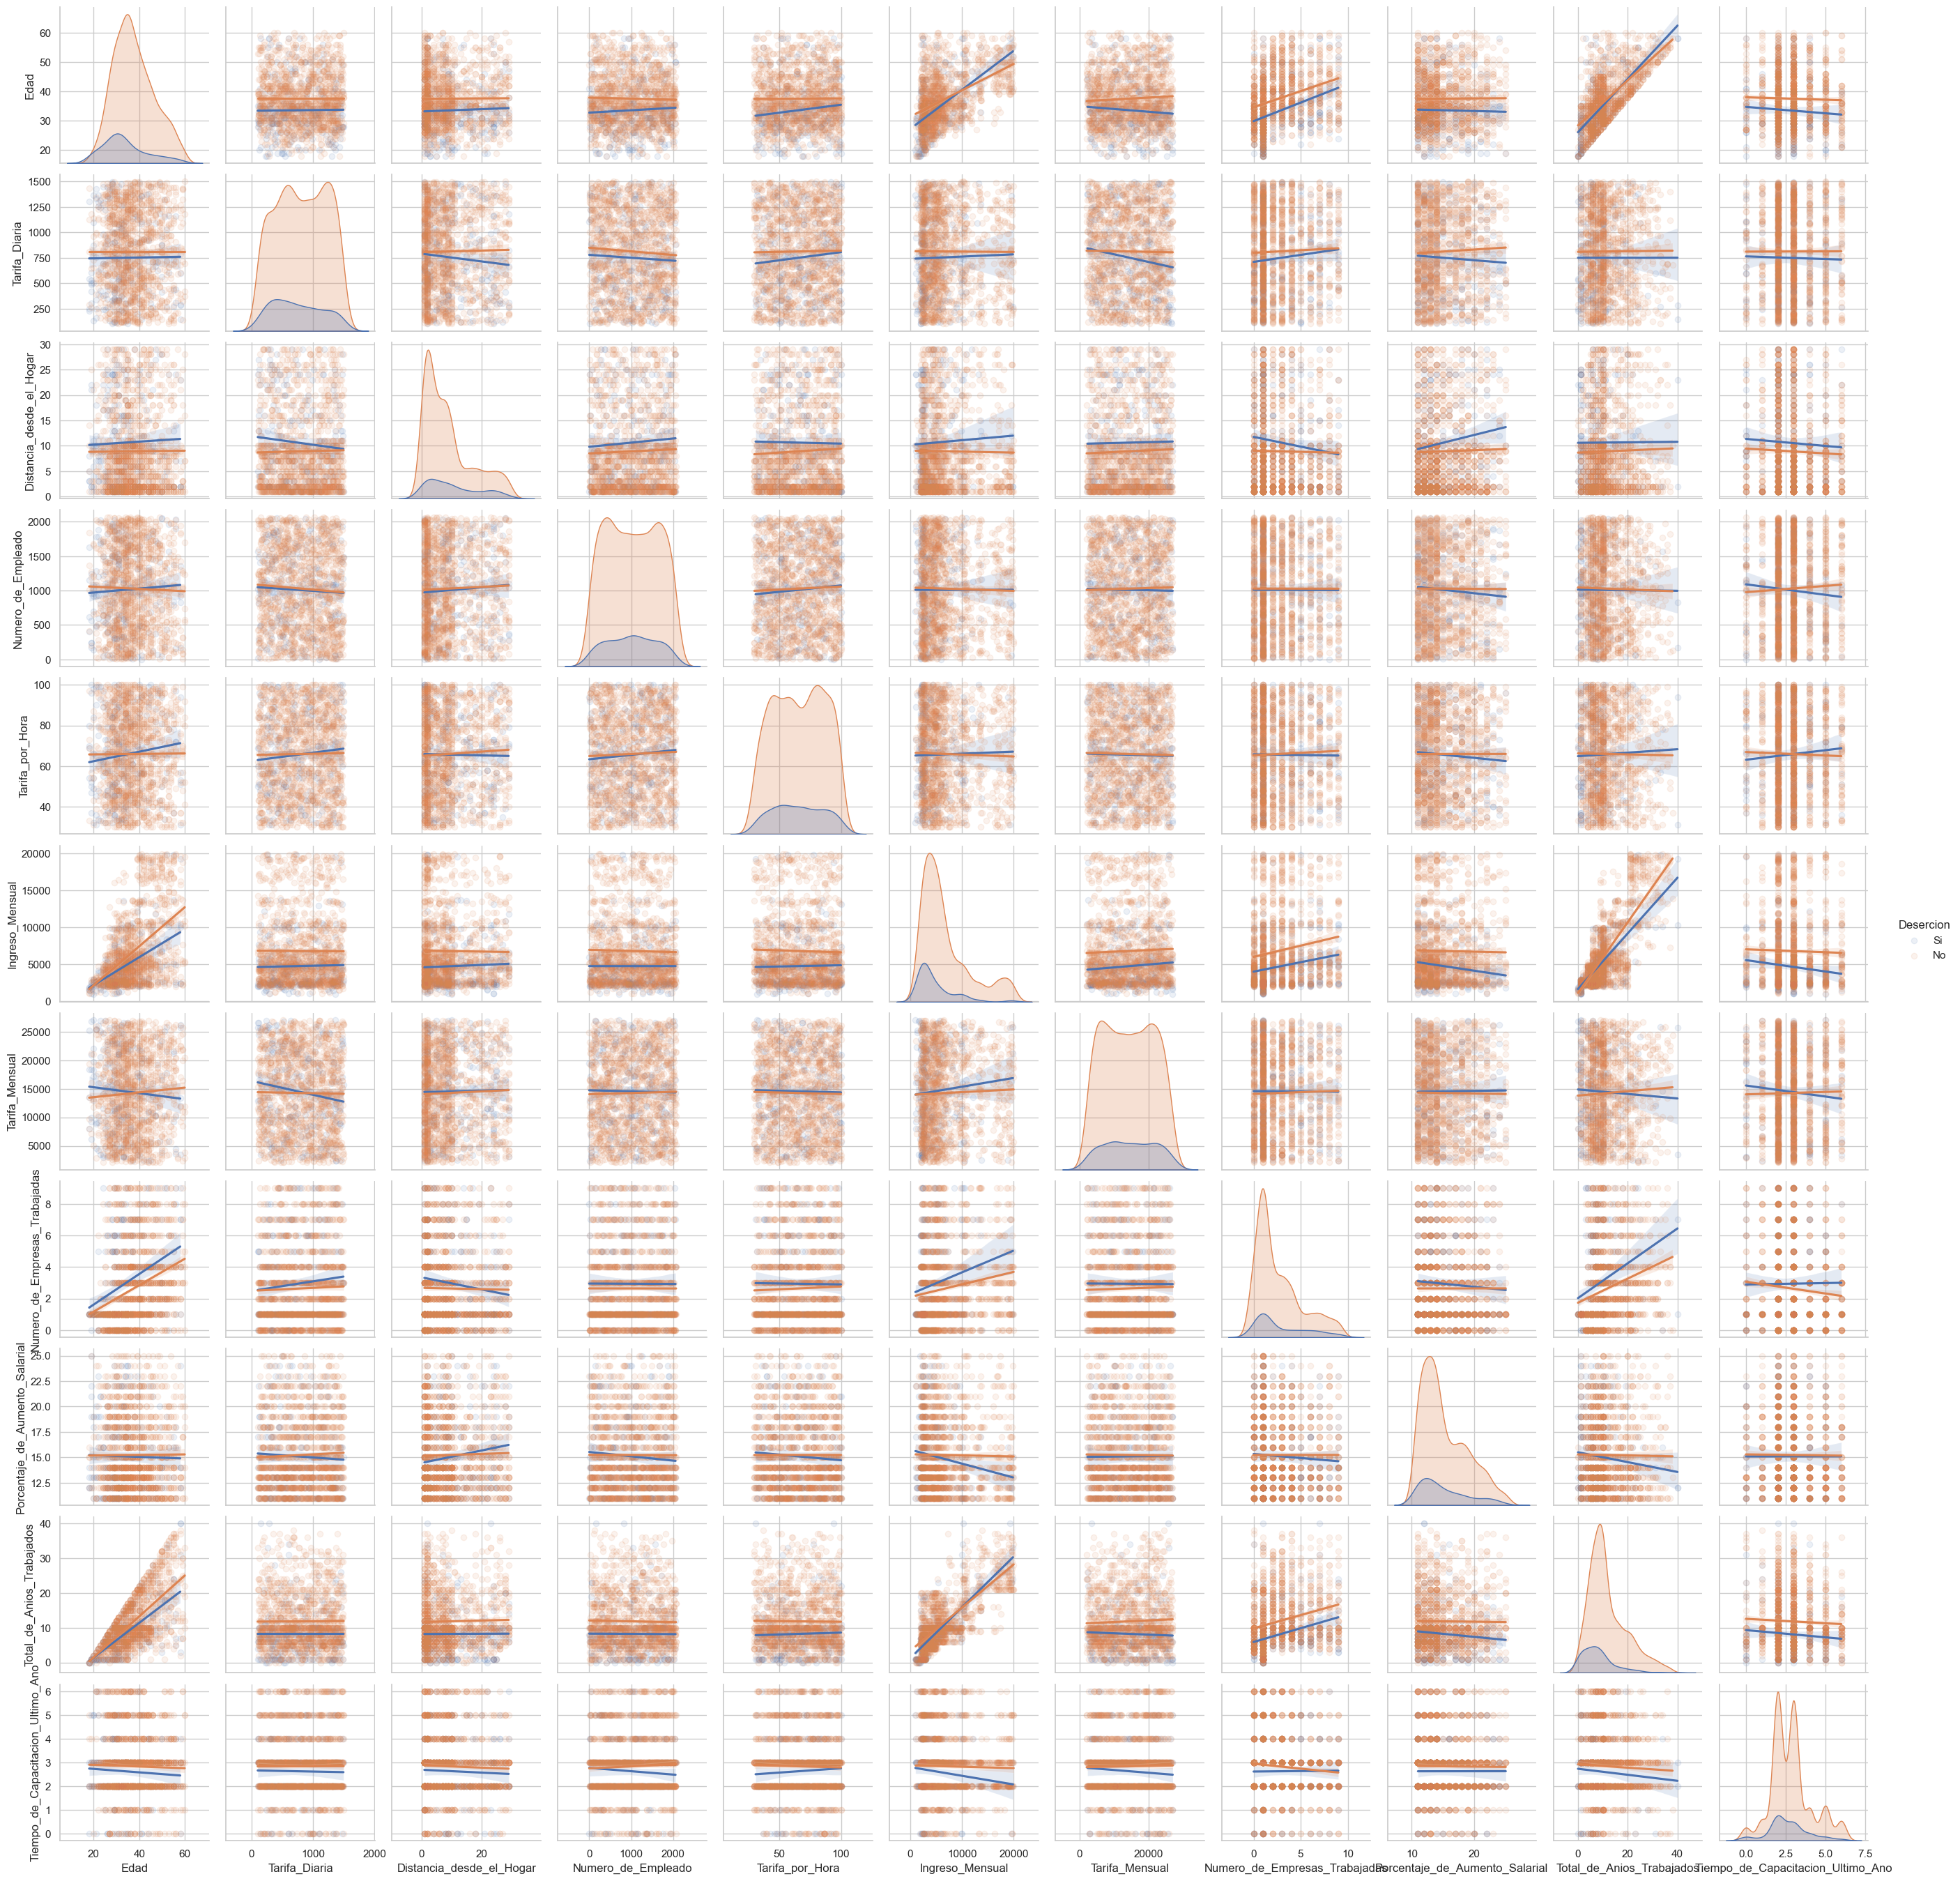

In [36]:
pseudo_numeric_cols = ['Educacion','Satisfaccion_con_el_Entorno', 'Compromiso_Laboral' , 'Satisfaccion_Laboral' ,
                     'Evaluacion_de_Desempeno', 'Satisfaccion_en_Relaciones', 'Equilibrio_Vida_Trabajo', 'Nivel_de_Trabajo',
                    'Nivel_de_Acciones']
excludeCols = pseudo_numeric_cols + ['Anios_con_el_Actual_Gerente','Anios_desde_la_Ultima_Promocion','Anios_en_el_Rol_Actual','Anios_en_la_Empresa']
pairplotCols = [x for x in list(datos.select_dtypes(include=np.number).columns) if x not in excludeCols]+ ['Desercion']
sns.pairplot(datos[pairplotCols], plot_kws={'scatter_kws': {'alpha': 0.1}},
             kind="reg", diag_kind = "kde"  , hue = 'Desercion' )

Ninguno de los gráficos muestra una gran diferencia entre los empleados que se han quedado (es decir, sin deserción) y los que han desertado. No me gusta usar gráficos de pares para analizar pequeñas diferencias, ya que puede haber otras interacciones con otras características que esta visualización no muestra.


## Distribuciones Coloreadas por Deserción

También podemos colorear las distribuciones mostradas anteriormente por una variable categórica. En este caso, colorearemos por **Deserción** ya que será nuestra variable objetivo. Algo de esto se vio en las diagonales del gráfico de pares mostrado anteriormente.

Además, agregamos una línea negra que muestra el porcentaje de empleados que han desertado a lo largo de las variables numéricas. Esto ayuda a dar una visión general de cómo cambia el % de Deserción a lo largo del rango de las características numéricas. El eje y en el lado derecho del gráfico muestra el porcentaje.


In [40]:
numeric_cols = list(datos.select_dtypes(include=np.number).columns)

fig_rows = 8
fig_cols = 3
fig = tls.make_subplots(rows=fig_rows, cols=fig_cols,
                          subplot_titles=tuple(numeric_cols));
curr_row = 1
curr_col = 1
for i, col in enumerate(numeric_cols):
    trace1 = go.Histogram(name = "No Desercion",
                          marker=dict( line=dict(color='black',width=1)),
                          x = list(datos[datos['Desercion'] == 'No'][col]),
                          opacity=0.5)
    trace2 = go.Histogram(name = 'Si Desercion',
                          marker=dict(line=dict(color='black',width=1)),
                          x = datos[datos['Desercion'] == 'Si'][col],
                          opacity=0.5)
    tmp3 = pd.DataFrame(pd.crosstab(datos[col],
                    datos['Desercion'].replace('Si',1).replace('No',0)))
    tmp3['Dese%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    extra_yAxis = 'y' + str(fig_rows * fig_cols + i+1)
    trace3 =  go.Scatter(x=tmp3.index, y=tmp3['Dese%'],
        yaxis = extra_yAxis, name='%Desercion', opacity = .8,
        marker=dict(color='black', line=dict(color='black', width=0.5)))

    fig.append_trace(trace1, curr_row, curr_col)
    fig.append_trace(trace2, curr_row, curr_col)

    if col not in ['Tarifa_Mensual','Tarifa_Diaria', 'Ingreso_Mensual']:
        fig.append_trace(trace3, curr_row, curr_col)
        fig['data'][-1].update(yaxis=extra_yAxis)
        yaxisStr = ''
        if curr_col == fig_cols:
            yaxisStr = '% Desercion'
        fig['layout']['yaxis' + str(fig_rows * fig_cols + i+1)] = dict(range=[0, max(tmp3['Dese%'])+10],
                         showgrid=True, overlaying='y'+str(i+1), anchor='x'+str(i+1), side='right',
                         title=yaxisStr)
    curr_col += 1
    if curr_col >= fig_cols + 1:
        curr_row += 1
        curr_col = 1

fig['layout'].update(title='Distribucion numerica coloreado por la deserción', width=900, height=900,
                     barmode='overlay', showlegend=False, font=dict(size=10))

py.iplot(fig)


En los gráficos anteriores, hay bastante información que se puede extraer. Quiero resaltar los siguientes puntos que se centran principalmente en las tasas/porcentajes de deserción (línea negra):

1. Los empleados más jóvenes (Edad) tienden a tener tasas de deserción más altas.
- De manera similar a la Edad, los empleados con el nivel más bajo de opciones de acciones y los puestos de trabajo más bajos también tienden a tener tasas de deserción más altas.
2. Además, muchas de las características relacionadas con los años (Años Totales de Trabajo, Años con el Gerente Actual, Años en la Empresa, etc.) muestran una tendencia general a la baja con respecto a las tasas de deserción. En otras palabras, las personas con menos años tienen porcentajes de deserción más altos.
3. Además, muchas de las características basadas en encuestas (Participación en el Trabajo, Balance de Vida Laboral, Satisfacción Laboral, etc.) tienden a tener porcentajes de deserción más altos cuanto menor es la puntuación del empleado.
4. Hay algunas observaciones extrañas a medida que disminuye el número de empleados para un rango particular. Por ejemplo, hay un empleado con deserción que tiene 40 años de trabajo en total (y ningún otro empleado en ese rango), lo que resulta en un porcentaje de deserción del '100%' para ese rango. Esto puede ser engañoso.

Ahora, echemos un vistazo a las características discretas/categóricas.

**Características Discretas/Categóricas Coloreadas por Deserción**

In [42]:
import math

# Obtener columnas categóricas
cat_cols = list(datos.select_dtypes(exclude=np.number).columns)

# Calcular el número de filas y columnas necesarias
n_plots = len(cat_cols)
fig_cols = 2  # número deseado de columnas
fig_rows = math.ceil(n_plots / fig_cols)  # calcular el número de filas necesarias

# Crear los subplots
fig = tls.make_subplots(rows=fig_rows, cols=fig_cols,
                        subplot_titles=tuple(cat_cols))

curr_row = 1
curr_col = 1

for i, col in enumerate(cat_cols):
    yaxisStr = ''
    offset_val = -0.3
    if col not in ['Desercion']:
        offset_val = -0.2
    trace1 = go.Bar(name='No Desercion', opacity=.8, width=0.6,
                    x=datos[datos['Desercion'] == 'No'][col].value_counts().index.values,
                    y=datos[datos['Desercion'] == 'No'][col].value_counts().values,
                    marker=dict(color='steelblue', line=dict(color='black', width=1)))

    trace2 = go.Bar(name='Si Desercion', opacity=.8, width=0.6, offset=offset_val,
                    x=datos[datos['Desercion'] == 'Si'][col].value_counts().index.values,
                    y=datos[datos['Desercion'] == 'Si'][col].value_counts().values,
                    marker=dict(color='orange', line=dict(color='black', width=1)))

    tmp3 = pd.DataFrame(pd.crosstab(datos[col],
                                    datos['Desercion'].replace('Si',1).replace('No',0)))
    tmp3['Dese%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    extra_yAxis = 'y' + str(fig_rows * fig_cols + i + 1)

    trace3 = go.Scatter(x=tmp3.index, y=tmp3['Dese%'], mode='markers',
                        yaxis=extra_yAxis, name='% Desercion', opacity=.8,
                        marker=dict(color='black', size=10))

    fig.append_trace(trace1, curr_row, curr_col)
    fig.append_trace(trace2, curr_row, curr_col)

    if col not in ['Desercion']:
        fig.append_trace(trace3, curr_row, curr_col)
        fig['data'][-1].update(yaxis=extra_yAxis)
        if curr_col == fig_cols:
            yaxisStr = '% Desercion'
        fig['layout']['yaxis' + str(fig_rows * fig_cols + i + 1)] = dict(range=[0, max(tmp3['Dese%']) + 10],
                                                                         showgrid=True, overlaying='y'+str(i+1), anchor='x'+str(i+1), side='right', title=yaxisStr)

    curr_col += 1
    if curr_col > fig_cols:
        curr_row += 1
        curr_col = 1

# Ajustar layout
fig['layout'].update(title='Conteo de Variables Categóricas en el Conjunto de Datos Coloreadas por Deserción',
                     width=900, height=600, showlegend=False, barmode='overlay', font=dict(size=10))

py.iplot(fig)


### Validemos con otros graficos las conclusiones generadas.

1. Los empleados más jóvenes (Edad) tienden a tener tasas de deserción más altas.

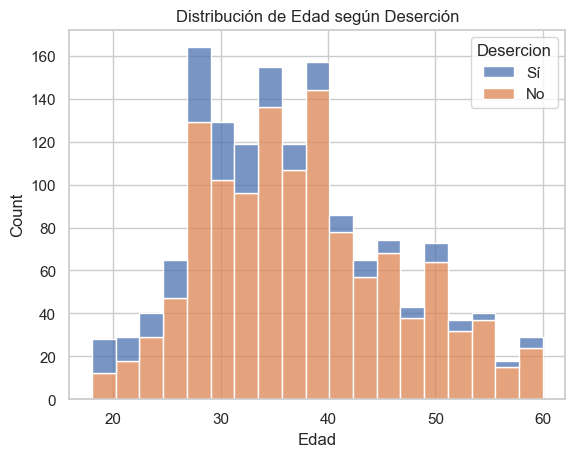

In [ ]:
# Distribución de empleados por edad y deserción
sns.histplot(data=datos, x='Edad', hue='Desercion', multiple='stack')
plt.title('Distribución de Edad según Deserción')
plt.show()


Características relacionadas con los años (Años Totales de Trabajo, Años con el Gerente Actual, Años en la Empresa, etc.) muestran una tendencia general a la baja con respecto a las tasas de deserción. En otras palabras, las personas con menos años tienen porcentajes de deserción más altos.

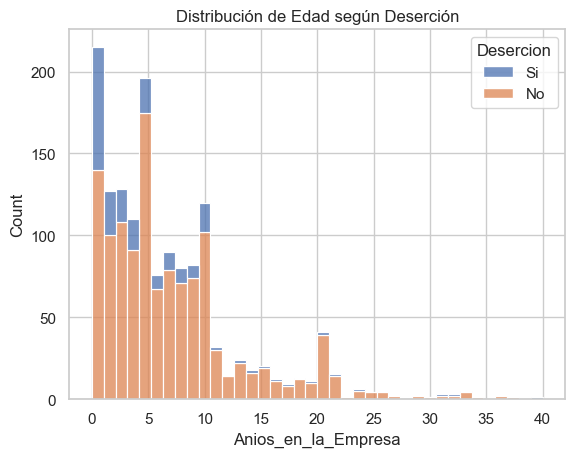

In [45]:
# Distribución de empleados por edad y deserción
sns.histplot(data=datos, x='Anios_en_la_Empresa', hue='Desercion', multiple='stack')
plt.title('Distribución de Años en la Empresa según Deserción')
plt.show()


características basadas en encuestas (Participación en el Trabajo, Balance de Vida Laboral, Satisfacción Laboral, etc.) tienden a tener porcentajes de deserción más altos cuanto menor es la puntuación del empleado.

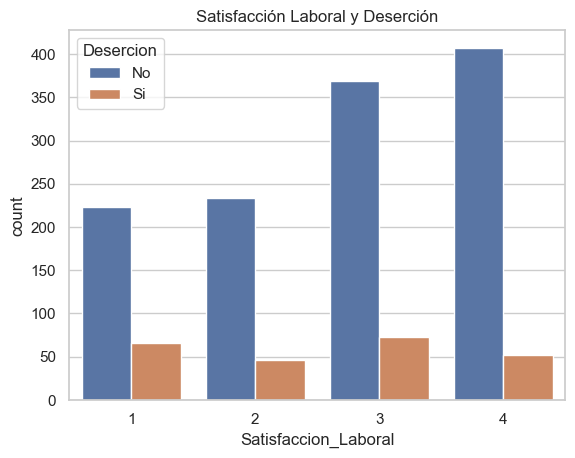

In [46]:
# Relación entre satisfacción laboral y deserción
sns.countplot(data=datos, x='Satisfaccion_Laboral', hue='Desercion')
plt.title('Satisfacción Laboral y Deserción')
plt.show()

Hay algunas observaciones extrañas a medida que disminuye el número de empleados para un rango particular. Por ejemplo, hay un empleado con deserción que tiene 40 años de trabajo en total (y ningún otro empleado en ese rango), lo que resulta en un porcentaje de deserción del '100%' para ese rango. Esto puede ser engañoso.

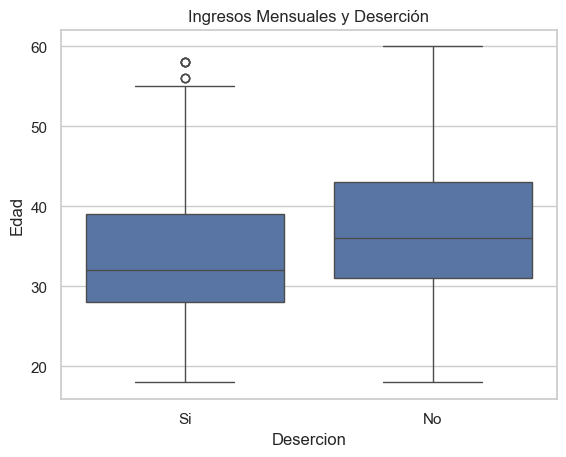

In [47]:
# Relación entre ingresos mensuales y deserción
sns.boxplot(data=datos, x='Desercion', y='Edad')
plt.title('Ingresos Mensuales y Deserción')
plt.show()

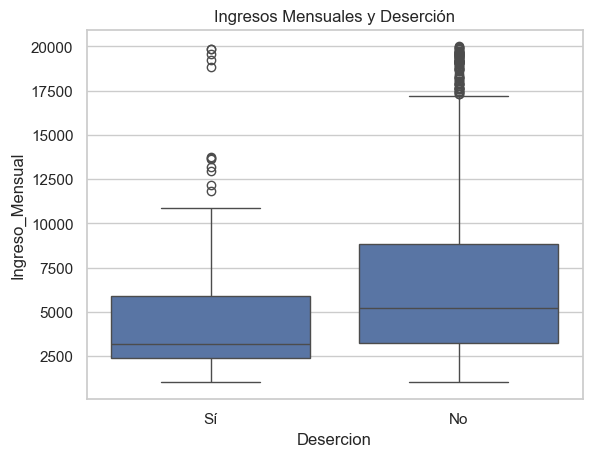

In [ ]:

# Relación entre ingresos mensuales y deserción
sns.boxplot(data=datos, x='Desercion', y='Ingreso_Mensual')
plt.title('Ingresos Mensuales y Deserción')
plt.show()


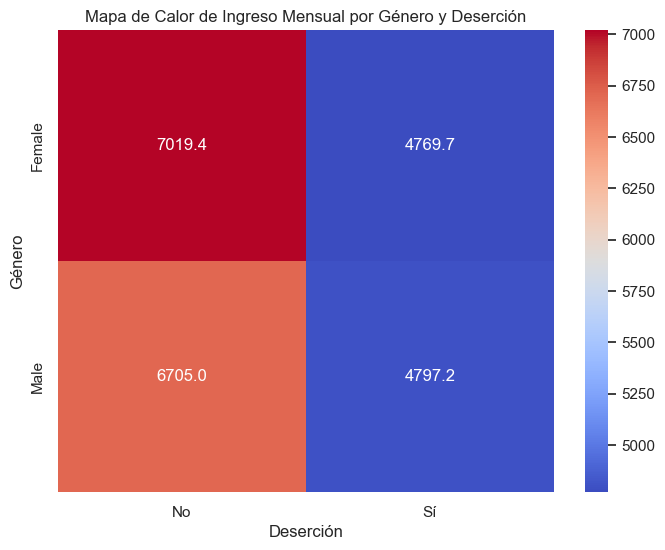

In [ ]:
# Agrupar por Sexo y Deserción, y calcular el Ingreso Mensual promedio
pivot_data = datos.pivot_table(values='Ingreso_Mensual', index='Genero', columns='Desercion', aggfunc='mean')

# Crear el gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.1f')

# Configuración del gráfico
plt.title('Mapa de Calor de Ingreso Mensual por Género y Deserción')
plt.xlabel('Deserción')
plt.ylabel('Género')
plt.show()


Grafico de deserciones por departamento

In [40]:
#print(datos['Departamento'].unique())

# Se filtra solo las filas donde 'Deserción' es "Sí"
datos_si = datos[datos['Desercion'] == 'Sí']

# Se agrupan por 'Departamento' y se cuentan la cantidad ´por 'Deserción'
sector_solo_si = datos_si.groupby('Departamento')['Desercion'].value_counts()

# Mostrar los resultados
sector_solo_si

Series([], Name: count, dtype: int64)

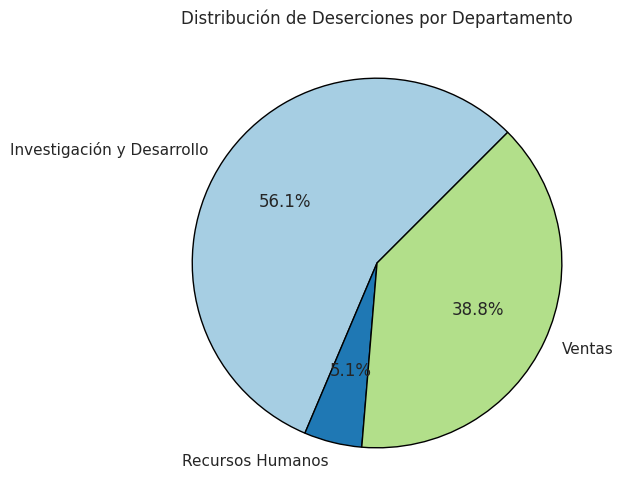

In [92]:
import matplotlib.pyplot as plt

# Filtrar solo las filas donde 'Deserción' es "Sí"
datos_si = datos[datos['Desercion'] == 'Si']

# Agrupar por 'Departamento' y contar la cantidad de deserciones
# size(): Agrupa las filas por el valor de Departamento y cuenta cuántas filas tiene cada departamento
#(es decir, cuántos casos de deserción hay en cada uno).
sector_solo_si = datos_si.groupby('Departamento').size()

# se crea  el gráfico circular
plt.figure(figsize=(8, 6))
sector_solo_si.plot.pie(
    startangle=45,
    autopct="%.1f%%",
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)

# Añadir título y etiquetas
plt.title("Distribución de Deserciones por Departamento")
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()  # Mostrar el gráfico


#Porcentaje de desercion con respecto a la edad y comparacion de desercion si o no segun edad

In [94]:
tmp1 = datos[(datos['Desercion'] == 'Si')]
tmp2 = datos[(datos['Desercion'] == 'No')]
tmp3 = pd.DataFrame(pd.crosstab(datos['Edad'],datos['Desercion']), )

tmp3['Des%'] = tmp3['Si'] / (tmp3['Si'] + tmp3['No']) * 100




In [95]:
trace1 = go.Bar(
        x=tmp1['Edad'].value_counts().keys().tolist(),
        y=tmp1['Edad'].value_counts().values.tolist(),
        name='Si_Desercion',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))


trace2 = go.Bar(
        x=tmp2['Edad'].value_counts().keys().tolist(),
        y=tmp2['Edad'].value_counts().values.tolist(),
        name='No_Desercion', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))

trace3 =  go.Scatter(
        x=tmp3.index,
        y=tmp3['Des%'],
        yaxis = 'y2',
        name='% Desercion', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

In [96]:
layout = dict(title =  str('Edad'),
              xaxis=dict(),
              yaxis=dict(title= 'Count'),
              yaxis2=dict(range= [-0, 75],
                          overlaying= 'y',
                          anchor= 'x',
                          side= 'right',
                          zeroline=False,
                          showgrid= False,
                          title= '% Desercion'
                         ))

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
py.iplot(fig)


In [63]:
tmp3

Desercion  No  Sí       Des%
Edad                        
18          4   4  50.000000
19          3   6  66.666667
20          5   6  54.545455
21          7   6  46.153846
22         11   5  31.250000
23         10   4  28.571429
24         19   7  26.923077
25         20   6  23.076923
26         27  12  30.769231
27         45   3   6.250000
28         34  14  29.166667
29         50  18  26.470588
30         51   9  15.000000
31         51  18  26.086957
32         50  11  18.032787
33         46  12  20.689655
34         68   9  11.688312
35         68  10  12.820513
36         63   6   8.695652
37         44   6  12.000000
38         56   2   3.448276
39         36   6  14.285714
40         52   5   8.771930
41         34   6  15.000000
42         44   2   4.347826
43         30   2   6.250000
44         27   6  18.181818
45         39   2   4.878049
46         29   4  12.121212
47         21   3  12.500000
48         17   2  10.526316
49         22   2   8.333333
50         25   5  16.666667
51         17   2  10.526316
52         15   3  16.666667
53         17   2  10.526316
54         18   0   0.000000
55         19   3  13.636364
56         11   3  21.428571
57          4   0   0.000000
58          9   5  35.714286
59         10   0   0.000000
60          5   0   0.000000